<a href="https://colab.research.google.com/github/dishadtu/textgen/blob/main/Deep_Learning_Phase1_Co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords  # for text cleaning
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # for sentiment analysis
from wordcloud import WordCloud  # for word cloud visualization
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load data
df = pd.read_excel('/content/drive/MyDrive/DEEP_LEARNING_DATASET/my_dataset.xlsx')


Mounted at /content/drive


In [2]:
df.head()

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [ ]:
# Check for missing values
print(df.isnull().sum())  # Identify columns with missing values




id                  0
date                0
likes               0
content             0
username            0
media               0
inferred company    0
dtype: int64


In [ ]:
df.dtypes

id                   int64
date                object
likes                int64
content             object
username            object
media               object
inferred company    object
dtype: object

In [ ]:
import re

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_text(text):
  # Lowercase text
  text = text.lower()
  # Remove hashtags, mentions, and URLs
  text = re.sub(r"#\S+|@\S+|https?://\S+", "", text)
  # Remove punctuation
  text = re.sub(r'[^\w\s]', '', text)
  # Remove stop words
  stop_words = stopwords.words("english")
  text = [word for word in text.split() if word not in stop_words]
  # Join words back into text
  text = " ".join(text)
  return text

# Apply text cleaning
df["content"] = df["content"].apply(clean_text)


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Convert date to datetime format
df["date"] = pd.to_datetime(df["date"])

# Sentiment analysis
analyzer = SentimentIntensityAnalyzer()
df["sentiment_compound"] = df["content"].apply(lambda text: analyzer.polarity_scores(text)["compound"])

# Text statistics
df["char_count"] = df["content"].apply(len)
df["word_count"] = df["content"].str.split().apply(len)

# Using appropriate column names based on our data
df["is_weekend"] = df["date"].dt.weekday >= 5  # Weekend indicator (True for Friday and Saturday)
df["num_hashtags"] = df["content"].str.split().apply(lambda words: sum(word.startswith("#") for word in words))  # Number of hashtags




Sentiment Score Distribution:
 0.0000    84909
 0.3612     6401
 0.4019     5785
 0.4404     5659
 0.5719     4891
           ...  
 0.8216        1
-0.9206        1
-0.8702        1
 0.1867        1
-0.1857        1
Name: sentiment_compound, Length: 5167, dtype: int64


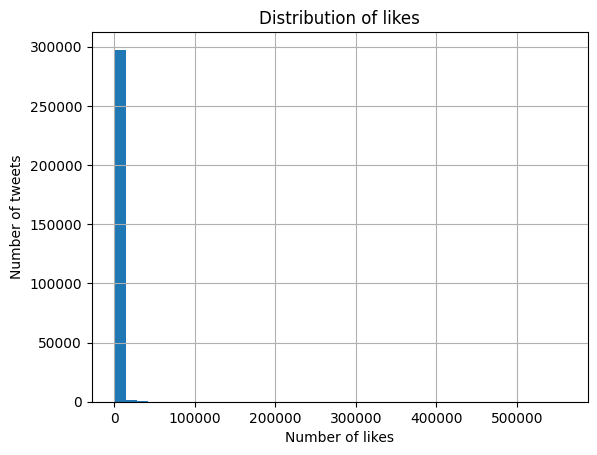


Numerical results of the distribution of likes:
count    300000.000000
mean        773.364793
std        4931.463419
min           0.000000
25%           3.000000
50%          76.000000
75%         364.000000
max      560193.000000
Name: likes, dtype: float64


In [ ]:
# Print sentiment score distribution
print("Sentiment Score Distribution:")
print(df["sentiment_compound"].value_counts())

# Plot histogram for likes
df["likes"].hist(bins=40)  # Histogram for likes with 40 bins
plt.xlabel("Number of likes")
plt.ylabel("Number of tweets")
plt.title("Distribution of likes")
plt.show()

# Print numerical results of the plot
print("\nNumerical results of the distribution of likes:")
print(df["likes"].describe())


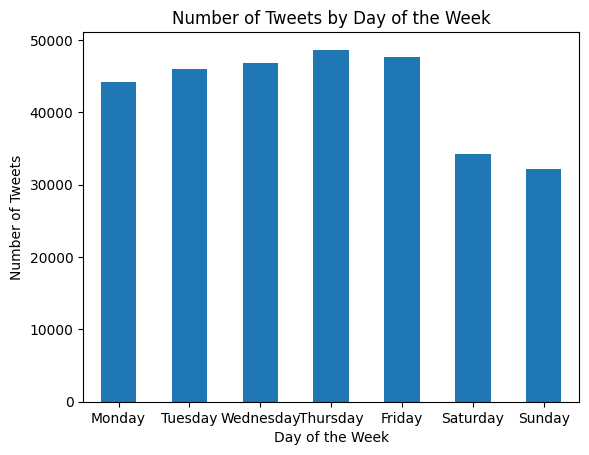

In [ ]:
# Plot bar graph with custom x-axis labels
df["date"].dt.weekday.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Day of the Week")
plt.xticks(ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=0)
plt.show()


                    sentiment_compound     likes
sentiment_compound            1.000000 -0.012576
likes                        -0.012576  1.000000


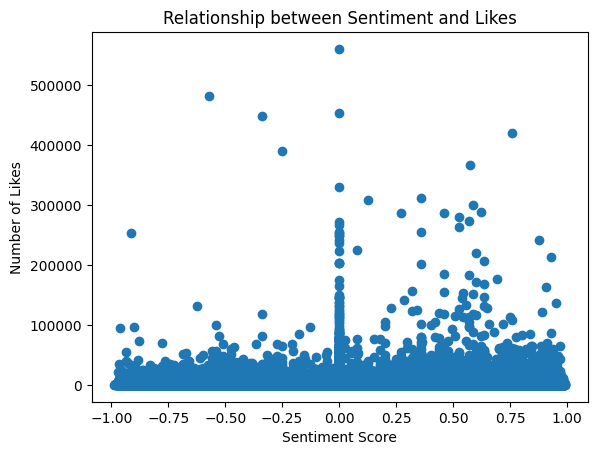

In [ ]:
# Correlation between sentiment score and engagement metrics (likes, retweets)
correlation = df[["sentiment_compound", "likes"]].corr()
print(correlation)  # Display correlation matrix

# Scatter plot between sentiment score and likes
plt.scatter(df["sentiment_compound"], df["likes"])
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Likes")
plt.title("Relationship between Sentiment and Likes")
plt.show()


In [ ]:
# Sample high and low engagement tweets for manual review
high_engagement_tweets = df.nlargest(10, "likes")["content"].tolist()
low_engagement_tweets = df.nsmallest(10, "likes")["content"].tolist()

# Print a few examples from each category
print("High Engagement Tweets:")
for tweet in high_engagement_tweets[:3]:  # Print only the first 3
  print(tweet)
print("\nLow Engagement Tweets:")
for tweet in low_engagement_tweets[:3]:  # Print only the first 3
  print(tweet)


High Engagement Tweets:
spoilers ahead time step watch new trailer get tickets today hyperlink hyperlink
hate drama also theres drama hyperlink
secret jhope mention mention dropped new collab get taste hyperlink mention hyperlink

Low Engagement Tweets:
lasu celebrates new dawn unbroken peace law faculty presents book fagbohun hyperlink hyperlink
learn best way get zero program product amp builder perspective november 18th webinar details hyperlink pictured 10 megawatthours solar energy exported grid home ceo mark kuntz hyperlink
linda ikeji partners ecobank empower young ladies hyperlink hyperlink


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


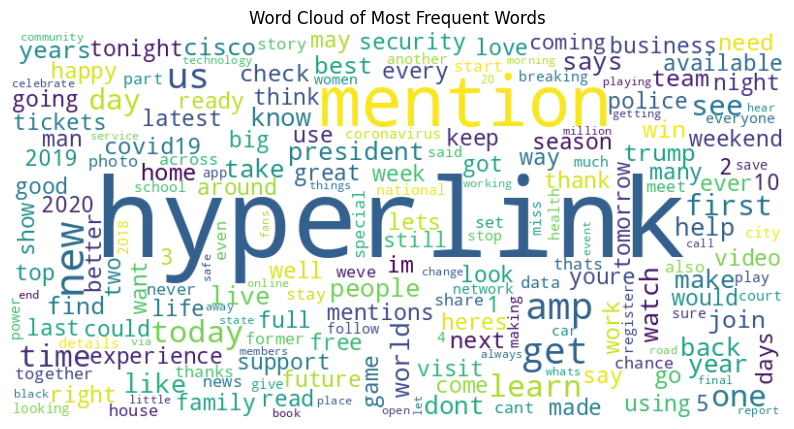

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download stopwords
import nltk
nltk.download('stopwords')

# Tokenize the text and convert to lowercase
tokens = df['content'].str.lower().apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = tokens.apply(lambda x: [word for word in x if word not in stop_words])

# Flatten the list of tokens
all_words = [word for sublist in filtered_tokens for word in sublist]

# Count the frequency of each word
word_freq = Counter(all_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()


In [ ]:
# Summary statistics for numerical columns
print(df.describe(include="all"))

<ipython-input-20-b02005d6dac2>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include="all"))


                   id                 date          likes            content  \
count   300000.000000               300000  300000.000000             300000   
unique            NaN               292301            NaN             273274   
top               NaN  2019-06-21 07:00:00            NaN  mention hyperlink   
freq              NaN                    6            NaN                300   
first             NaN  2018-01-01 00:08:35            NaN                NaN   
last              NaN  2020-12-31 23:54:10            NaN                NaN   
mean    150000.500000                  NaN     773.364793                NaN   
std      86602.684716                  NaN    4931.463419                NaN   
min          1.000000                  NaN       0.000000                NaN   
25%      75000.750000                  NaN       3.000000                NaN   
50%     150000.500000                  NaN      76.000000                NaN   
75%     225000.250000                  N

In [ ]:
!pip install numpy

In [ ]:
import numpy as np

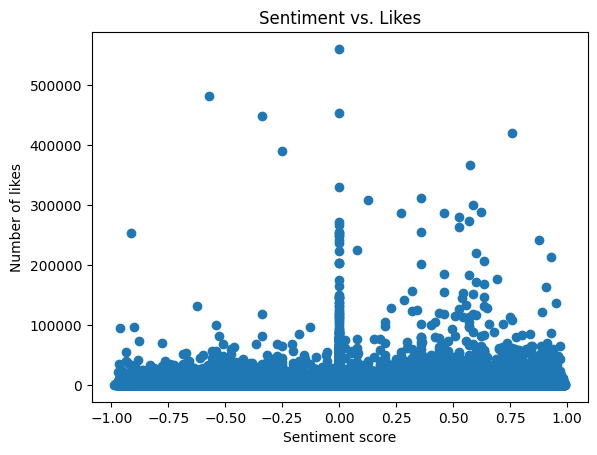

                          id     likes  sentiment_compound  char_count  \
id                  1.000000  0.001753           -0.001576    0.002859   
likes               0.001753  1.000000           -0.012576   -0.026252   
sentiment_compound -0.001576 -0.012576            1.000000    0.184645   
char_count          0.002859 -0.026252            0.184645    1.000000   
word_count          0.003240 -0.017109            0.201119    0.973381   
num_hashtags             NaN       NaN                 NaN         NaN   

                    word_count  num_hashtags  
id                    0.003240           NaN  
likes                -0.017109           NaN  
sentiment_compound    0.201119           NaN  
char_count            0.973381           NaN  
word_count            1.000000           NaN  
num_hashtags               NaN           NaN  


In [ ]:
# Sentiment vs. Likes scatter plot
plt.scatter(df["sentiment_compound"], df["likes"])
plt.xlabel("Sentiment score")
plt.ylabel("Number of likes")
plt.title("Sentiment vs. Likes")
plt.show()

# Correlation matrix
correlation = df.select_dtypes(include=[np.number]).corr()
print(correlation)

In [ ]:
df.head()

,id,date,likes,content,username,media,inferred company,sentiment_compound,char_count,word_count,is_weekend,num_hashtags
0,1,2020-12-12 00:47:00,1,spend weekend morning ham egg cheese wrap pair...,TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,0.4588,118,18,True,0
1,2,2018-06-30 10:04:20,2750,watch rapper mention freestyle hour hyperlink ...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,0.1779,55,7,True,0
2,3,2020-09-29 19:47:28,57,canadian armenian community demands ban milita...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,-0.5574,94,12,False,0
3,4,2020-10-01 11:40:09,152,1st europe devastated covid19 italy redoubled ...,MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,-0.6124,94,12,False,0
4,5,2018-10-19 14:30:46,41,congratulations pauletha butts mention present...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,0.8126,132,16,False,0


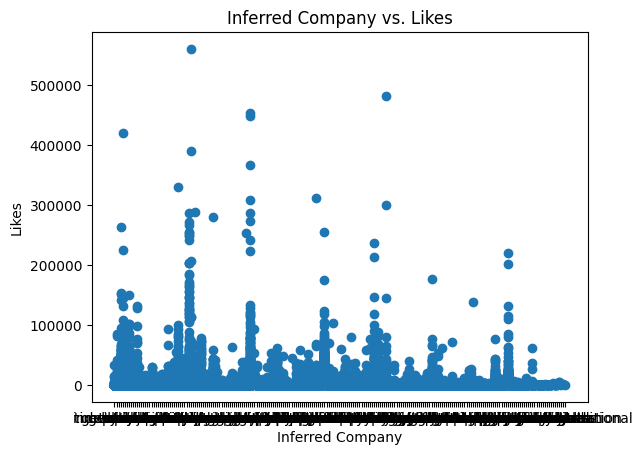

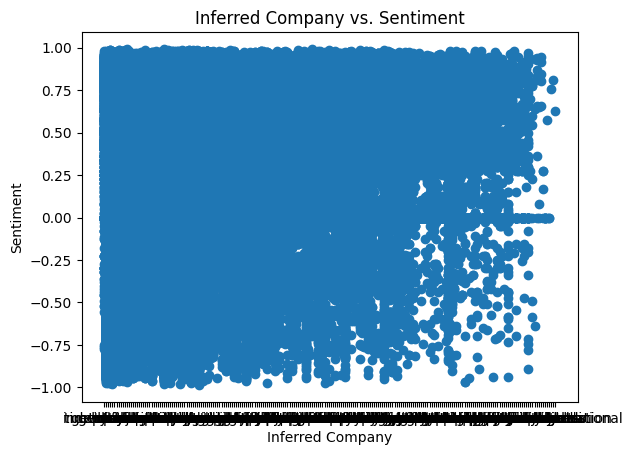

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate the correlations
# correlation_likes = df['inferred company'].corr(df['likes'])
# correlation_sentiment = df['inferred company'].corr(df['sentiment_compound'])

# # Print the correlations
# print("Correlation of 'inferred company' with likes:", correlation_likes)
# print("Correlation of 'inferred company' with sentiment:", correlation_sentiment)

# Create a scatter plot of 'inferred company' vs. likes
plt.scatter(df['inferred company'], df['likes'])
plt.xlabel('Inferred Company')
plt.ylabel('Likes')
plt.title('Inferred Company vs. Likes')
plt.show()

# Create a scatter plot of 'inferred company' vs. sentiment
plt.scatter(df['inferred company'], df['sentiment_compound'])
plt.xlabel('Inferred Company')
plt.ylabel('Sentiment')
plt.title('Inferred Company vs. Sentiment')
plt.show()


In [ ]:
df.sample(n=10)

,id,date,likes,content,username,media,inferred company,sentiment_compound,char_count,word_count,is_weekend,num_hashtags
74702,74703,2018-07-26 09:30:41,1920,behind special album ltrise upgt baggage check...,ASTRO_Staff,[Photo(previewUrl='https://pbs.twimg.com/media...,astro,0.4019,73,10,False,0
158169,158170,2018-09-26 04:17:01,61,thanks tuning mention mayo clinic faith hope s...,MayoClinic,[Photo(previewUrl='https://pbs.twimg.com/media...,mayo clinic,0.7506,133,19,False,0
150594,150595,2019-09-22 14:53:06,0,arsenal fans react bukayo saka starts aston vi...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,0.0000,69,10,True,0
72415,72416,2019-03-23 16:00:01,31,everyone yay spring colors back us hyperlink,ASUSUSA,[Photo(previewUrl='https://pbs.twimg.com/media...,asus,0.5267,44,7,True,0
149921,149922,2020-03-24 15:57:34,0,abakaliki virology centre commence covid19 tes...,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,0.0000,70,8,False,0
124638,124639,2019-10-10 22:21:27,935,prefer alone around people adore experiencing ...,EmersonBarrett,[Photo(previewUrl='https://pbs.twimg.com/media...,emerson,-0.0258,189,24,False,0
259633,259634,2020-03-13 22:18:46,1,dude store got last one hyperlink hyperlink,CiscoCotto,[Photo(previewUrl='https://pbs.twimg.com/media...,cisco,0.0000,43,7,False,0
163039,163040,2018-02-08 06:23:03,1,collaborate compute secure connect mention bas...,cisco_in,[Photo(previewUrl='https://pbs.twimg.com/media...,cisco,0.3400,204,26,False,0
179030,179031,2018-12-10 04:03:22,279,thank mention fantastic night hyperlink,tdgarden,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,td,0.7269,39,5,False,0
84068,84069,2018-06-08 06:46:22,1040,time cover gets trump right michael dantonio v...,CNN,[Photo(previewUrl='https://pbs.twimg.com/media...,cnn,0.0000,76,11,False,0


In [ ]:
df2 = df.copy()

In [ ]:
df2.head()

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [4]:
# Get the "media" column
media_data = df["media"]

# Create a new column to store numerical representation (1 for photo, 2 for video, 3 for gif)
df["media_type"] = pd.NA

# Define a function to assign values based on the media type in the string
def assign_media_type(media_string):
  media_type = media_string.split("(")[0].strip()  # Extract type, remove leading/trailing spaces
  if media_type in ("[Photo", "[Video", "[Gif"):  # Check for all possibilities in a single condition
    return {"[Photo": 1, "[Video": 2, "[Gif": 3}[media_type]  # Use dictionary for efficient mapping
  else:
    return None  # Unknown type

# Apply the function to each media string
df["media_type"] = media_data.apply(assign_media_type)

# Handle missing values (replace with your preferred approach)
#data.dropna(subset=["media_type"], inplace=True)  # Drop rows with missing media type

# Now you have the "media_type" column with numerical values
print(df["media_type"].head())  # View the first few rows


0    1
1    1
2    1
3    1
4    1
Name: media_type, dtype: int64


In [ ]:
df.sample(5)

,id,date,likes,content,username,media,inferred company,media_type
53806,53807,2019-08-05 14:19:01,2,"In 2⃣0⃣1⃣5⃣ alone, 1⃣1⃣7⃣5⃣ rhinos were killed...",CiscoUKI,[Photo(previewUrl='https://pbs.twimg.com/media...,cisco,1
31470,31471,2020-02-03 18:07:02,0,#ARMdata announcement: A new version of large-...,armnewsteam,[Photo(previewUrl='https://pbs.twimg.com/media...,arm,1
284785,284786,2019-09-25 23:05:03,0,Time To End Security Vote <hyperlink> <hyperlink>,IndependentNGR,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,1
86781,86782,2019-10-15 04:08:18,1071,Matane 🇯🇵! I’m taking MY <mention> <mention> U...,LanceHoyt,[Video(thumbnailUrl='https://pbs.twimg.com/ext...,monster,2
62014,62015,2020-05-18 07:25:16,186,<mention> A young girl holds a placard outside...,hkfp,[Photo(previewUrl='https://pbs.twimg.com/media...,free,1


Average Engagement by Media Type:
media_type
1     558.221062
2    1363.251147
3     748.043441
Name: likes, dtype: float64


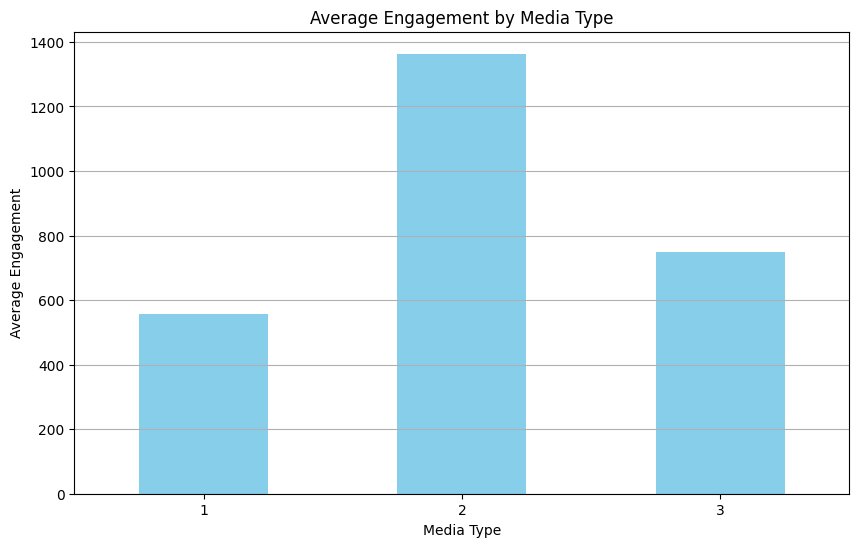

In [ ]:
# Group the DataFrame by 'media_type' and calculate the average engagement for each media type
engagement_by_media = df.groupby('media_type')['likes'].mean()

# Display the average engagement for each media type
print("Average Engagement by Media Type:")
print(engagement_by_media)

# Plot the average engagement for each media type
plt.figure(figsize=(10, 6))
engagement_by_media.plot(kind='bar', color='skyblue')
plt.title('Average Engagement by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


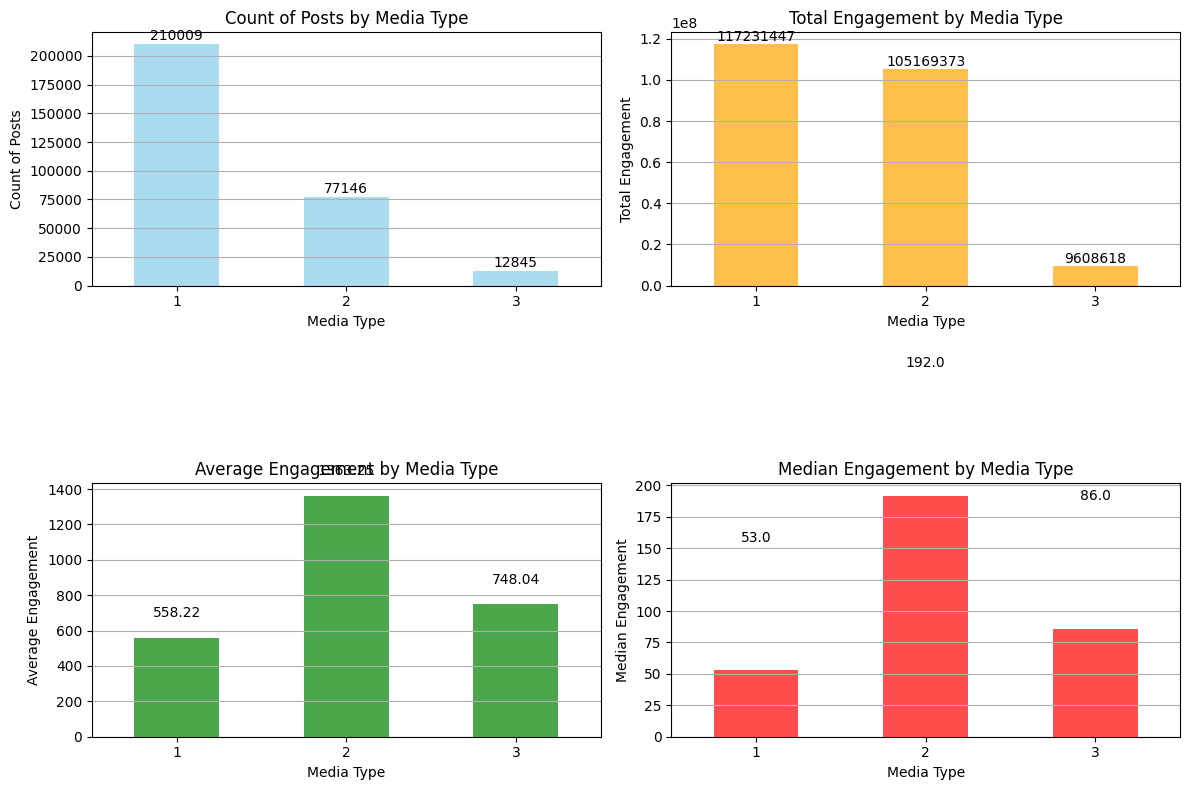

Engagement Metrics by Media Type:
            Post Count  Total Engagement  Average Engagement  \
media_type                                                     
1               210009         117231447          558.221062   
2                77146         105169373         1363.251147   
3                12845           9608618          748.043441   

            Median Engagement  
media_type                     
1                        53.0  
2                       192.0  
3                        86.0  


In [ ]:
# Calculate engagement metrics
media_metrics = df.groupby('media_type')['likes'].agg(['count', 'sum', 'mean', 'median'])
media_metrics.columns = ['Post Count', 'Total Engagement', 'Average Engagement', 'Median Engagement']

# Plot each engagement metric separately
plt.figure(figsize=(12, 8))

# Plot count of posts
plt.subplot(2, 2, 1)
media_metrics['Post Count'].plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Count of Posts by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Count of Posts')
plt.xticks(rotation=0)
plt.grid(axis='y')
for index, value in enumerate(media_metrics['Post Count']):
    plt.text(index, value + 1000, str(value), ha='center', va='bottom')

# Plot total engagement
plt.subplot(2, 2, 2)
media_metrics['Total Engagement'].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Total Engagement by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Total Engagement')
plt.xticks(rotation=0)
plt.grid(axis='y')
for index, value in enumerate(media_metrics['Total Engagement']):
    plt.text(index, value + 10000, str(value), ha='center', va='bottom')

# Plot average engagement
plt.subplot(2, 2, 3)
media_metrics['Average Engagement'].plot(kind='bar', color='green', alpha=0.7)
plt.title('Average Engagement by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Average Engagement')
plt.xticks(rotation=0)
plt.grid(axis='y')
for index, value in enumerate(media_metrics['Average Engagement']):
    plt.text(index, value + 100, str(round(value, 2)), ha='center', va='bottom')

# Plot median engagement
plt.subplot(2, 2, 4)
media_metrics['Median Engagement'].plot(kind='bar', color='red', alpha=0.7)
plt.title('Median Engagement by Media Type')
plt.xlabel('Media Type')
plt.ylabel('Median Engagement')
plt.xticks(rotation=0)
plt.grid(axis='y')
for index, value in enumerate(media_metrics['Median Engagement']):
    plt.text(index, value + 100, str(value), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Display calculated metrics
print("Engagement Metrics by Media Type:")
print(media_metrics)


Correlation Matrix for Numerical Features:
               likes  media_type
likes       1.000000    0.054376
media_type  0.054376    1.000000


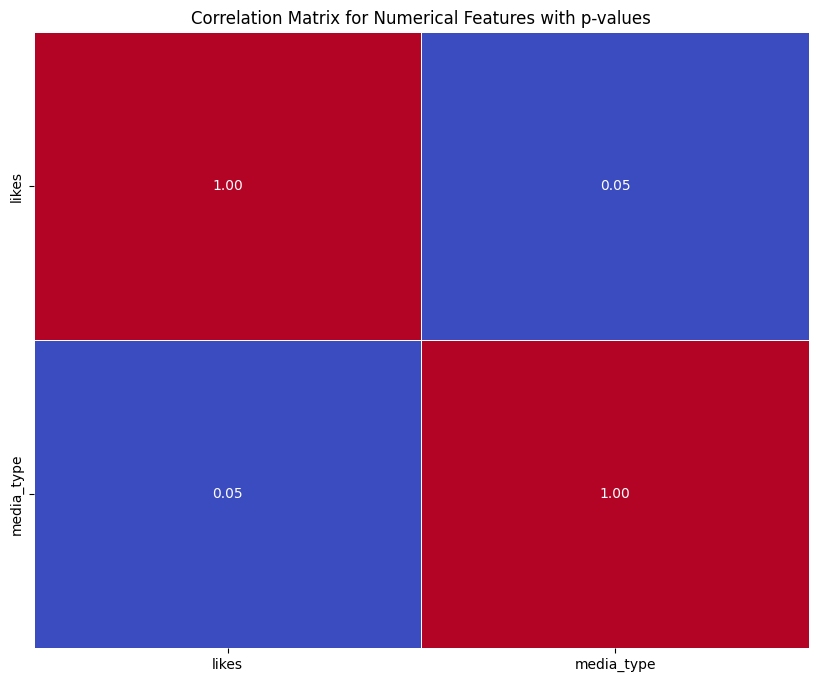


P-values:
           likes media_type
likes        0.0        0.0
media_type   0.0        0.0


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Define numerical features for correlation analysis
numerical_features = ['likes','media_type']  # Add more features here as needed

# Calculate correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Function to calculate p-values
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

# Calculate p-values
p_values = calculate_pvalues(df[numerical_features])

# Print correlation matrix
print("Correlation Matrix for Numerical Features:")
print(correlation_matrix)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False)
plt.title('Correlation Matrix for Numerical Features with p-values')
plt.show()

# Print p-values
print("\nP-values:")
print(p_values)


In [ ]:
# Using pandas get_dummies() function to one-hot encode the 'inferred company' column
inferred_numerical = pd.get_dummies(df, columns=['inferred company'], prefix='company')

# Print the first few rows of the encoded DataFrame
print(inferred_numerical.head())


   id                date  likes  \
0   1 2020-12-12 00:47:00      1   
1   2 2018-06-30 10:04:20   2750   
2   3 2020-09-29 19:47:28     57   
3   4 2020-10-01 11:40:09    152   
4   5 2018-10-19 14:30:46     41   

                                             content        username  \
0  Spend your weekend morning with a Ham, Egg, an...    TimHortonsPH   
1  Watch rapper <mention> freestyle for over an H...       IndyMusic   
2  Canadian Armenian community demands ban on mil...       CBCCanada   
3  1st in Europe to be devastated by COVID-19, It...  MKWilliamsRome   
4  Congratulations to Pauletha Butts of <mention>...           BGISD   

                                               media  media_type  company_aa  \
0  [Photo(previewUrl='https://pbs.twimg.com/media...           1           0   
1  [Photo(previewUrl='https://pbs.twimg.com/media...           1           0   
2  [Photo(previewUrl='https://pbs.twimg.com/media...           1           0   
3  [Photo(previewUrl='https://

In [ ]:
# Get the "inferred company" column
company_data = df["inferred company"]

# Create a new column to store numerical representation of inferred company
df["company_numerical"] = pd.NA

# Define a function to assign values based on the company name
def assign_company_numerical(company_string):
    # Replace any non-alphanumeric characters with underscore
    company_string = ''.join(e for e in company_string if e.isalnum() or e == ' ')
    # Convert to lowercase and replace spaces with underscore
    company_string = company_string.lower().replace(' ', '_')
    # Return the numerical representation
    return company_string

# Apply the function to each inferred company string
df["company_numerical"] = company_data.apply(assign_company_numerical)

# Now you have the "company_numerical" column with numerical values
print(df["company_numerical"].head())  # View the first few rows


0    tim_hortons
1    independent
2            cbc
3       williams
4    independent
Name: company_numerical, dtype: object


In [ ]:

# Print the first few rows of the DataFrame with the new column
print(df.head())


   id                date  likes  \
0   1 2020-12-12 00:47:00      1   
1   2 2018-06-30 10:04:20   2750   
2   3 2020-09-29 19:47:28     57   
3   4 2020-10-01 11:40:09    152   
4   5 2018-10-19 14:30:46     41   

                                             content        username  \
0  Spend your weekend morning with a Ham, Egg, an...    TimHortonsPH   
1  Watch rapper <mention> freestyle for over an H...       IndyMusic   
2  Canadian Armenian community demands ban on mil...       CBCCanada   
3  1st in Europe to be devastated by COVID-19, It...  MKWilliamsRome   
4  Congratulations to Pauletha Butts of <mention>...           BGISD   

                                               media inferred company  \
0  [Photo(previewUrl='https://pbs.twimg.com/media...      tim hortons   
1  [Photo(previewUrl='https://pbs.twimg.com/media...      independent   
2  [Photo(previewUrl='https://pbs.twimg.com/media...              cbc   
3  [Photo(previewUrl='https://pbs.twimg.com/media...      

In [ ]:
df.dtypes

id                            int64
date                 datetime64[ns]
likes                         int64
content                      object
username                     object
media                        object
inferred company             object
media_type                    int64
company_numerical            object
dtype: object

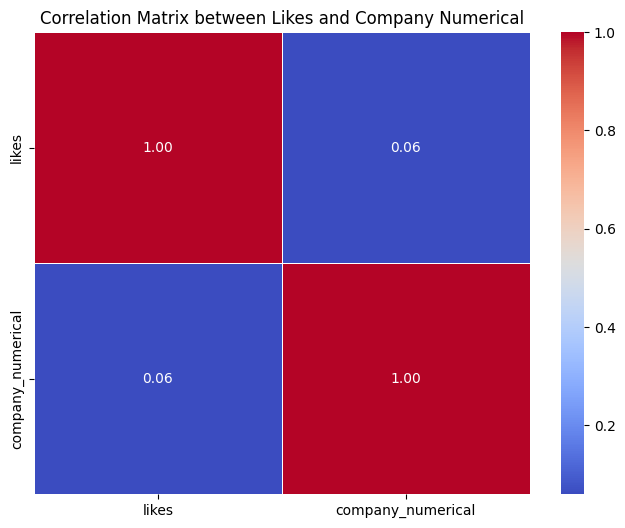

Correlation Matrix between Likes and Company Numerical:
                      likes  company_numerical        p_value
likes              1.000000           0.060056  1.004258e-237
company_numerical  0.060056           1.000000  1.004258e-237


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming 'inferred_company' column exists in the DataFrame
# Create a new column to store numerical representation of inferred company names
df['company_numerical'] = pd.factorize(df['inferred company'])[0]

# Drop rows with missing values if any
df.dropna(subset=['company_numerical'], inplace=True)

# Select relevant columns for correlation analysis
correlation_df = df[['likes', 'company_numerical']]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()



# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Likes and Company Numerical')
plt.show()
# Calculate correlation coefficient and p-value
correlation_coef, p_value = pearsonr(df['likes'], df['company_numerical'])

# Add p-value to the correlation matrix
correlation_matrix['p_value'] = p_value

# Print the numerical correlation values with p-value
print("Correlation Matrix between Likes and Company Numerical:")
print(correlation_matrix)


In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
from nltk.corpus import wordnet

def calculate_readability_score(content):
  """
  Calculates the Flesch-Kincaid readability score for a given text.

  Args:
      content (str): The text for which readability score is to be calculated.

  Returns:
      float: The Flesch-Kincaid readability score.
  """
  # Split the content into sentences and words
  sentences = content.split(".")
  words = content.split()

  # Calculate average sentence length
  avg_sentence_length = len(words) / len(sentences) if sentences else 0

  # Calculate average word length (excluding punctuation)
  num_syllables = 0
  for word in words:
    word = word.strip().lower()
    if word.isalpha():  # Check if word only contains letters (avoid punctuation)
      num_syllables += len(wordnet.synsets(word))  # Use WordNet to estimate syllables

  avg_word_length = num_syllables / len(words) if words else 0

  # Calculate Flesch-Kincaid score (higher score indicates easier reading)
  readability_score = 0.39 * avg_word_length + 11.8 * avg_sentence_length - 15.59

  return readability_score

# Add a new column for readability score
df["readability_score"] = df["content"].apply(calculate_readability_score)


In [12]:
df.head()

,id,date,likes,content,username,media,inferred company,media_type,company_numerical,readability_score
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,1,0,156.827931
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,1,1,103.502000
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,1,2,151.253571
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,1,3,71.918333
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,1,1,293.250000


Correlation between readability score and likes: -0.004784163715042099
Correlation coefficient: -0.004784163715042088
p-value: 0.00878270802918926


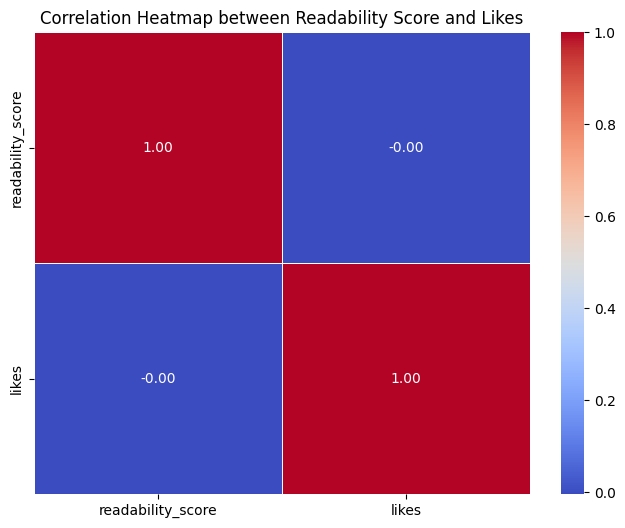

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assuming your DataFrame is named 'df'
correlation = df["readability_score"].corr(df["likes"])

print("Correlation between readability score and likes:", correlation)

# Calculate correlation coefficient and p-value
correlation, p_value = pearsonr(df["readability_score"], df["likes"])

print("Correlation coefficient:", correlation)
print("p-value:", p_value)

# Create a correlation heatmap
correlation_matrix = df[["readability_score", "likes"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap between Readability Score and Likes')
plt.show()


In [ ]:
from textblob import TextBlob

# Define political keywords
political_keywords =   ['politics', 'government', 'election', 'democracy', 'president', 'congress,','trump','police','covid19','court','biden','court','impeachement']


# Define a function to assign political polarity based on sentiment and presence of political keywords
def assign_political_polarity(text):
    # Perform sentiment analysis
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity

    # Check if any political keywords are present in the text
    if any(keyword in text.lower() for keyword in political_keywords):
        # Assign political polarity based on sentiment
        if sentiment > 0:
            return 'Positive Political'
        elif sentiment < 0:
            return 'Negative Political'
        else:
            return 'Neutral Political'
    else:
        return 'Non-Political'

# Apply the function to each row in the DataFrame and create a new column for political polarity
df['political_polarity'] = df['content'].apply(assign_political_polarity)


In [ ]:
# Define a function to map the political polarity categories to numerical values
def map_political_polarity(political_polarity):
    if political_polarity == 'Positive Political':
        return 1
    elif political_polarity == 'Negative Political':
        return -1
    else:
        return 0

# Apply the function to create a new numerical column for political polarity
df['political_polarity_numerical'] = df['political_polarity'].apply(map_political_polarity)

# Display the first few rows to verify the changes
print(df[['political_polarity', 'political_polarity_numerical']].head())


   political_polarity  political_polarity_numerical
0       Non-Political                             0
1       Non-Political                             0
2       Non-Political                             0
3  Positive Political                             1
4       Non-Political                             0


Correlation coefficient: 0.007514758877326386
p-value: 3.854309036845085e-05


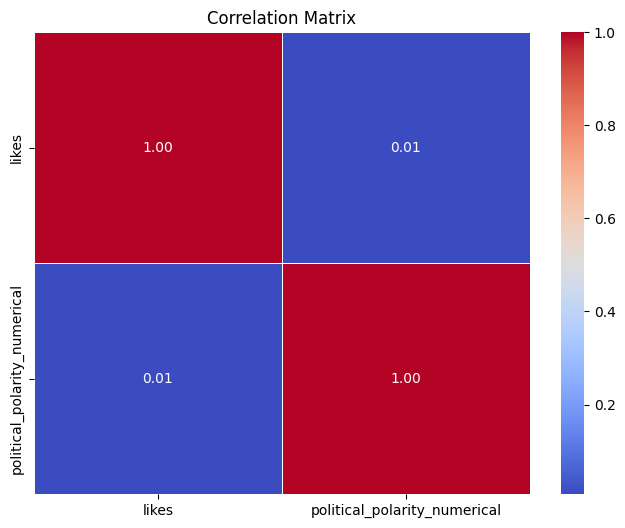

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculate the correlation matrix
correlation_matrix = df[['likes', 'political_polarity_numerical']].corr()

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['likes'], df['political_polarity_numerical'])

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

# Print the correlation coefficient and p-value
print("Correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)

plt.show()


In [15]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.4 MB/s eta 0:00:00


In [16]:
from textstat import gunning_fog

# Define a function to calculate Gunning fog index for a given text
def calculate_gunning_fog(text):
    return gunning_fog(text)

# Add a new column for Gunning fog index
df['gunning_fog_index'] = df['content'].apply(calculate_gunning_fog)


In [17]:
df.head()

,id,date,likes,content,username,media,inferred company,media_type,company_numerical,readability_score,gunning_fog_index
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons,1,0,156.827931,9.89
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,1,1,103.502000,8.00
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc,1,2,151.253571,19.89
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams,1,3,71.918333,14.11
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent,1,1,293.250000,15.97


Correlation between Gunning fog index and likes: -0.02209394547876003
p-value: 1.0209531436395552e-33


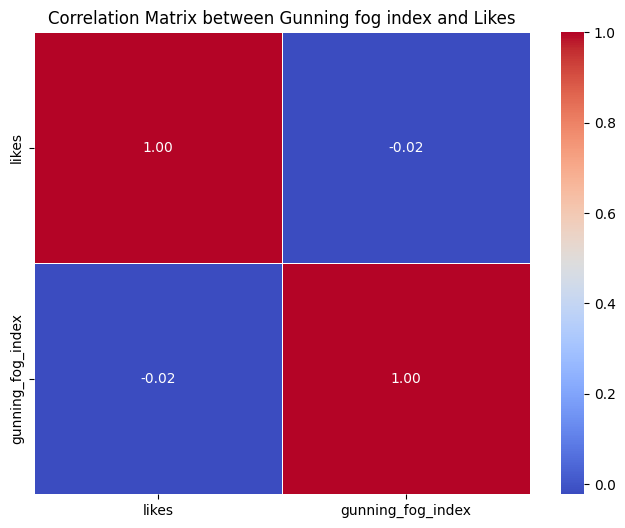

In [18]:
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation coefficient
correlation = df['gunning_fog_index'].corr(df['likes'])

# Calculate p-value
p_value = pearsonr(df['gunning_fog_index'], df['likes'])[1]

print("Correlation between Gunning fog index and likes:", correlation)
print("p-value:", p_value)

# Plot correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df[['likes', 'gunning_fog_index']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Gunning fog index and Likes')
plt.show()


In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install nltk

In [ ]:
import nltk